# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html

In [7]:
# Extract all rows of data

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Find all rows with the "data-row" class
rows = soup.find_all('tr', class_='data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Loop through the scraped data to create a list of rows
mars_data = []  # Initialize an empty list to store rows of data

for row in rows:  # Loop through each row identified earlier
    columns = row.find_all('td')  # Find all columns (data cells) within the row
    row_data = [col.text.strip() for col in columns]  # Extract and clean text data from each column
    mars_data.append(row_data)  # Add the cleaned row data to the list

# Extract headers from the table
header_row = soup.find('tr')  # Find the first row, which contains headers
column_names = [header.text.strip() for header in header_row.find_all('th')]  # Extract text from each <th> tag

print("Column Names:", column_names)  # Preview column names

Column Names: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(mars_data, columns=column_names)  # Ensure column names align with headers


In [13]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
mars_weather_df.dtypes



id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [16]:
# Change data types for data analysis
mars_weather_df["terrestrial_date"] = pd.to_datetime(mars_weather_df["terrestrial_date"])  # Convert to datetime
mars_weather_df["sol"] = mars_weather_df["sol"].astype(int)  # Convert to integer
mars_weather_df["ls"] = mars_weather_df["ls"].astype(int)  # Convert to integer
mars_weather_df["month"] = mars_weather_df["month"].astype(int)  # Convert to integer
mars_weather_df["min_temp"] = mars_weather_df["min_temp"].astype(float)  # Convert to float
mars_weather_df["pressure"] = mars_weather_df["pressure"].astype(float)  # Convert to float



In [17]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
# 1. How many months are there on Mars?
# Count the number of unique months
unique_months = mars_weather_df["month"].nunique()  # Count the number of unique months
print(f"There are {unique_months} unique months on Mars.")  # Print the result


There are 12 unique months on Mars.


In [20]:
# 2. How many sols (Martian days) worth of data are there?
# Calculate the total number of sols
total_sols = mars_weather_df["sol"].count()  # Count the number of rows
print(f"There are {total_sols} sols (Martian days) worth of data.")  # Print the result


There are 1867 sols (Martian days) worth of data.


In [21]:
# 3. What is the average minimum temperature by month?
# Calculate the average minimum temperature by month
avg_min_temp_by_month = mars_weather_df.groupby("month")["min_temp"].mean()  # Group by month and calculate the mean
avg_min_temp_by_month  # Display the result


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Average Minimum Temperature (°C)')

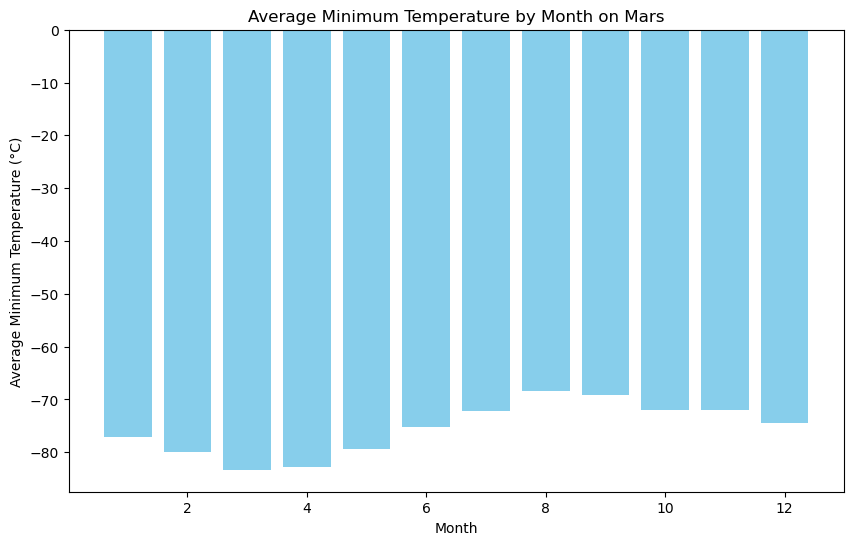

In [ ]:
# Plot the average minimum temperature by month using bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(avg_min_temp_by_month.index, avg_min_temp_by_month, color='skyblue')  # Create a bar chart
plt.title("Average Minimum Temperature by Month on Mars")  # Add title
plt.xlabel("Month")  # Add x-axis label
plt.ylabel("Average Minimum Temperature (°C)")  # Add y-axis label




Text(0.5, 0, 'Month')

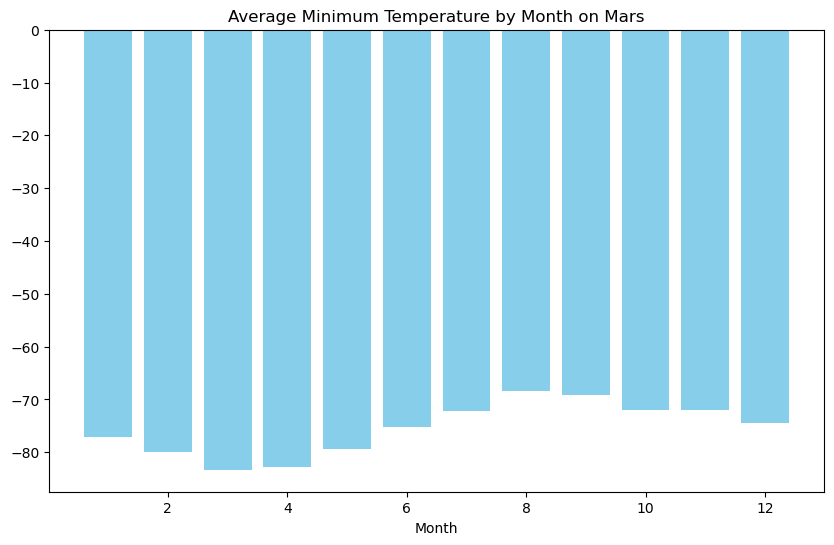

In [33]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph using a bar chart
# Sort the average minimum temperature by month in ascending order
sorted_avg_min_temp_by_month = avg_min_temp_by_month.sort_values()  # Sort the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(sorted_avg_min_temp_by_month.index, sorted_avg_min_temp_by_month, color='skyblue')  # Create a bar chart
plt.title("Average Minimum Temperature by Month on Mars")  # Add title
plt.xlabel("Month")  # Add x-axis label


In [34]:
# 4. What is the average pressure by month?
# Calculate the average pressure by month
avg_pressure_by_month = mars_weather_df.groupby("month")["pressure"].mean()  # Group by month and calculate the mean
avg_pressure_by_month  # Display the result


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Atmospheric Pressure')

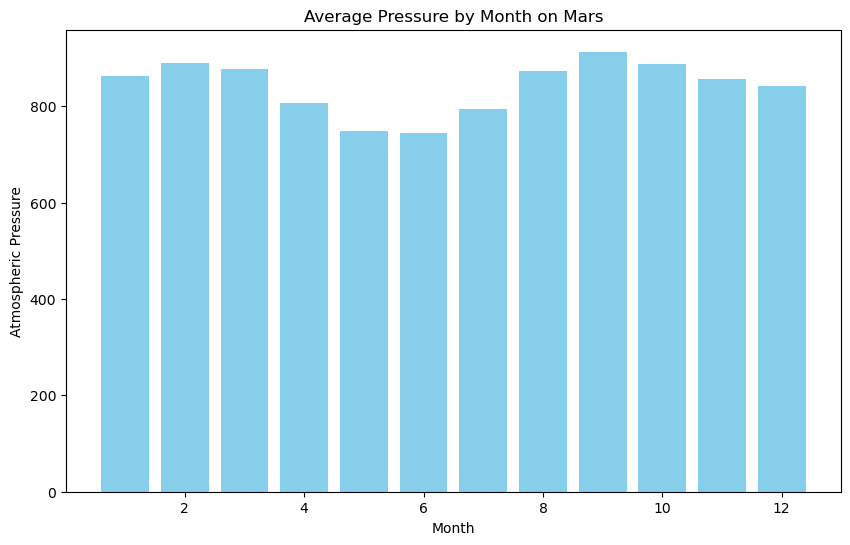

In [35]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month, color='skyblue')  # Create a bar chart
plt.title("Average Pressure by Month on Mars")  # Add title
plt.xlabel("Month")  # Add x-axis label
plt.ylabel("Atmospheric Pressure")  # Add y-axis label


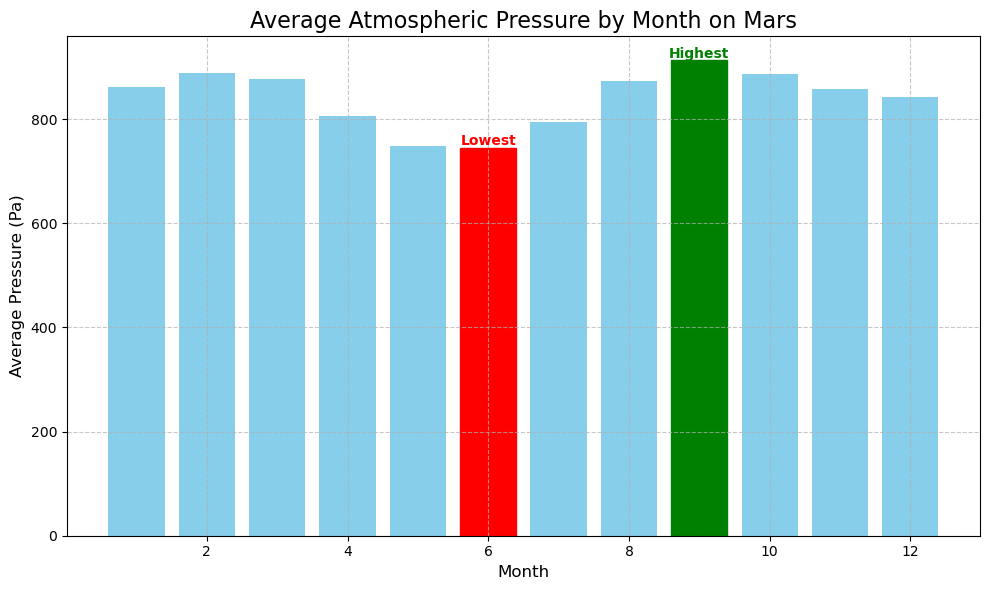

In [38]:
# Calculate the average pressure by month
avg_pressure_by_month = mars_weather_df.groupby("month")["pressure"].mean()

# Find the month with the lowest and highest average pressure
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()

# Create the plot
plt.figure(figsize=(10, 6))  # Set figure size
bars = plt.bar(avg_pressure_by_month.index, avg_pressure_by_month, color='skyblue')  # Create bar chart

# Highlight the highest and lowest pressure months
bars[lowest_pressure_month - 1].set_color('red')  # Highlight lowest pressure month
bars[highest_pressure_month - 1].set_color('green')  # Highlight highest pressure month

# Add labels and title
plt.title("Average Atmospheric Pressure by Month on Mars", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Pressure (Pa)", fontsize=12)

# Add annotations for clarity
plt.text(lowest_pressure_month, avg_pressure_by_month[lowest_pressure_month] + 5, 
         "Lowest", color='red', ha='center', fontsize=10, fontweight='bold')
plt.text(highest_pressure_month, avg_pressure_by_month[highest_pressure_month] + 5, 
         "Highest", color='green', ha='center', fontsize=10, fontweight='bold')

# Display the plot
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


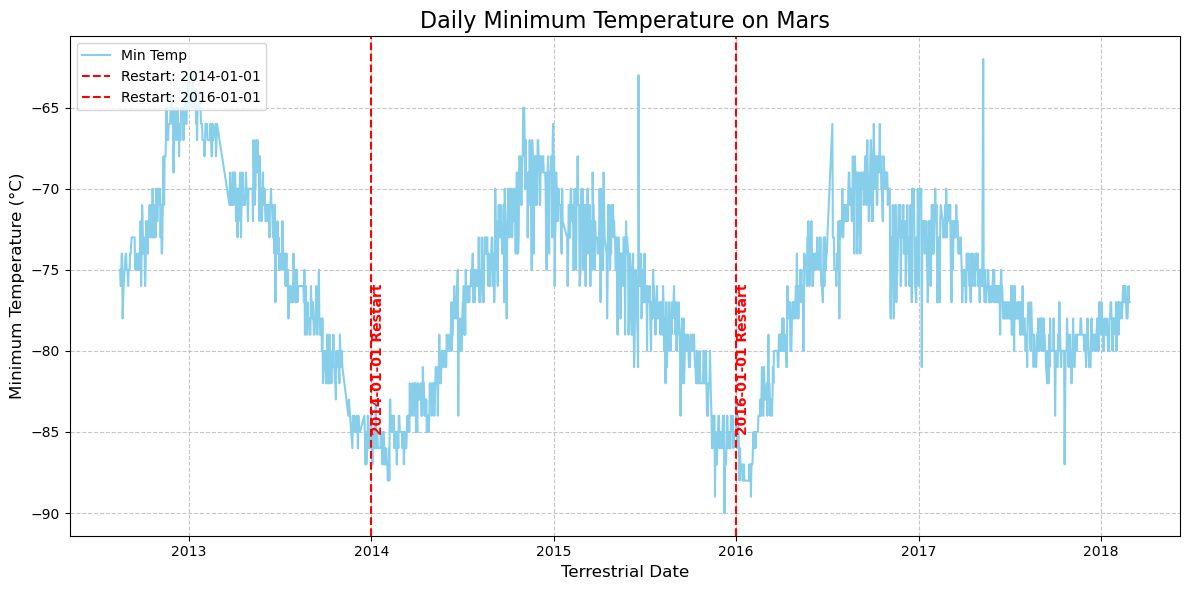

In [40]:
# Plot daily minimum temperatures
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(mars_weather_df["terrestrial_date"], mars_weather_df["min_temp"], color='skyblue', label="Min Temp")  # Line plot

# Add title and labels
plt.title("Daily Minimum Temperature on Mars", fontsize=16)
plt.xlabel("Terrestrial Date", fontsize=12)
plt.ylabel("Minimum Temperature (°C)", fontsize=12)

# Highlight points where the temperature cycle "restarts"
# Define the restart dates based on your data (adjust indices as needed)
restart_dates = ["2014-01-01", "2016-01-01"]  # Replace with actual restart dates in your dataset
for date in restart_dates:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', label=f"Restart: {date}")

# Annotate the restart points
for date in restart_dates:
    plt.text(pd.to_datetime(date), mars_weather_df["min_temp"].min() + 5,  # Position text slightly above the minimum temp
             f"{date} Restart", color='red', rotation=90, fontsize=10, fontweight='bold')

# Add gridlines and legend
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(loc="upper left")  # Add legend to describe the lines

# Display the plot
plt.tight_layout()
plt.show()


#### Minimum Temperature

The data indicates that the minimum average temptaure peaks at it's coldest on month 3 with it getting warmer up until month 8

#### Atmospheric Pressure

Lowest pressure appears on month 6 with the highest being month 9.

#### Year Length

based on the tempature fluxuations. I'd say Mars years length is actually double earths. This is solely based on the tempature cycle from the data we've been given. Interesting stuff though!

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [41]:
# Write the data to a CSV
mars_weather_df.to_csv("mars_weather.csv", index=False)  # Write the data to a CSV file without row numbers


In [42]:
browser.quit()